#Logistic Regression Using Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.0,9.0)


Data Preprocessing

In [2]:
data=pd.read_csv(r"D:\01-MS\Spring 20\ML - 6341\Assignment\sgemm_product.csv")
data["run"]= np.mean(data.iloc[:,15:18],axis=1)


mean_run=np.mean(data["run"],axis=0)
print(mean_run)

#Binary Classification
data["run_class"]=np.where(data['run']>=mean_run, 1, 0)

y=data["run_class"]

X=data.iloc[:,0:14]


217.54665350441502


Data Partition 70:30

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Logistic regression Class

In [5]:
class LogisticRegression:
    def __init__(self, alpha=0.001, epochs=1000, conv_thres=0.000001,intercept=False, verbose=False):
        self.alpha=alpha
        self.epochs=epochs
        self.conv_thres=conv_thres
        self.fit_intercept=intercept
        self.verbose=verbose
        
    def add_intercept(self, X):
        intercept=np.ones((X.shape[0],1))
        return np.concatenate((intercept,X),axis=1)
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def loss(self, h,y):
        return (-y* np.log(h) - (1-y)*np.log(1-h)).mean()
    
    def fit(self, X,y):
        if self.fit_intercept:
            X=self.add_intercept(X)
            
        #weights intialization
        self.beta=np.zeros(X.shape[1])
        loss=0
        for i in range(self.epochs):
            t_loss=loss
            z = np.dot(X,self.beta)
            h = self.sigmoid(z)
 
            gradient = np.dot(X.T, (h - y)) / y.size
            self.beta -= self.alpha * gradient
            loss=self.loss(h,y)
            if abs(loss-t_loss) <=self.conv_thres:
                print("Converged at ",i)
                break
            if (self.verbose == True and i % 1000 == 0 ):
                z = np.dot(X, self.beta)
                h = self.sigmoid(z)
                print('loss: {0} \t'.format(self.loss(h,y)))
            
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        return self.sigmoid(np.dot(X, self.beta))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_prob(X) >= threshold)

Perform a simple run

In [0]:
lr= LogisticRegression(alpha=0.01, epochs=10, conv_thres=0.000001,intercept=False, verbose=True)
%time lr.fit(X_train,y_train)

pred=lr.predict(X_test)



loss: 7.78771929052101 	


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


CPU times: user 712 ms, sys: 456 ms, total: 1.17 s
Wall time: 615 ms


In [0]:
##Accuracy
(pred==y_test).mean()
print(pred)

[False False False ... False False False]


Plot AUC-ROC

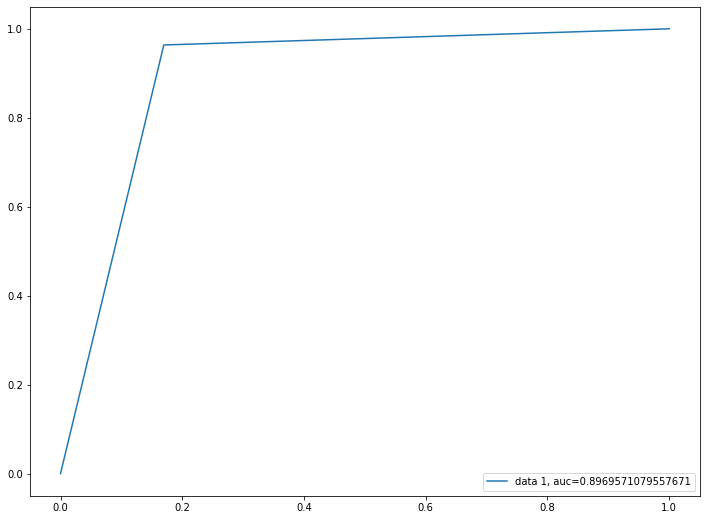

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Experiment1: Hyperparameter Tuning

In [0]:
alpha=[0.01, 0.001,0.0001]

for i in range(len(alpha)):
  lr= LogisticRegression(alpha=alpha[i], epochs=100000, intercept=False, verbose=True)
  %time lr.fit(X_train,y_train)
  
  pred_train[i]=lr.predict(X_train)
  pred_test[i]=lr.predict(X_test)
  


loss: 7.78771929052101 	


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


loss: 1.7207064152494347 	
loss: 1.7984523124589182 	
loss: 1.8566957291504522 	
loss: 1.614886136218528 	
loss: 1.6596420283623587 	
loss: 1.7886756910239305 	
loss: 1.606973222279719 	
loss: 1.5824329133790909 	
loss: 1.6222303142967118 	
loss: 2.487077619145668 	
loss: 1.5394185954366615 	
loss: 2.157433222999018 	
loss: 1.9075931230662635 	
loss: 1.7640324185760308 	
loss: 2.008838259098344 	
loss: 1.674006514834024 	
loss: 1.7285385375634617 	
loss: 1.7191821343527656 	
loss: 1.7105658750739088 	
loss: 1.7016332050017227 	
loss: 1.6925560556623054 	
loss: 1.683393964676902 	
loss: 1.674233449831348 	
loss: 1.6651326969701776 	
loss: 1.6560807395504913 	
loss: 1.6470907554173722 	
loss: 1.6382594705736413 	
loss: 1.6295442412389742 	
loss: 1.6209110201259644 	
loss: 1.6124297718171898 	
loss: 1.6041011047395164 	
loss: 1.595971418380694 	
loss: 1.5880190462450494 	
loss: 1.5801746415456321 	
loss: 1.572517792481398 	
loss: 1.5650048852515415 	
loss: 1.5576288192951078 	
loss: 1.550

In [0]:

print(pred_train)

[False  True  True ... False  True False]


Print Accuracy

In [0]:
for i in range(len(alpha)):
  ##Test Accuracy
  
  print("Test Accuracy for learning rate {0} is {1}".format(alpha[i],((pred_test[i]==y_test).mean())))

  #Train accuracy
  print("Training Accuracy for learning rate {0} is {1}".format(alpha[i],((pred_train[i]==y_train).mean())))
  


Test Accuracy for learning rate 0.01 is 0.8612444812362031
Training Accuracy for learning rate 0.01 is 0.8612582781456953
Test Accuracy for learning rate 0.001 is 0.9054635761589404
Training Accuracy for learning rate 0.001 is 0.9049195837275308
Test Accuracy for learning rate 0.0001 is 0.8922047461368653
Training Accuracy for learning rate 0.0001 is 0.8930936613055819


In [0]:
pred_train

[array([False,  True,  True, ...,  True,  True,  True]),
 array([False,  True,  True, ..., False,  True,  True]),
 array([False,  True,  True, ..., False,  True,  True]),
 array([False,  True,  True, ..., False,  True, False])]

AUC-ROC Plot

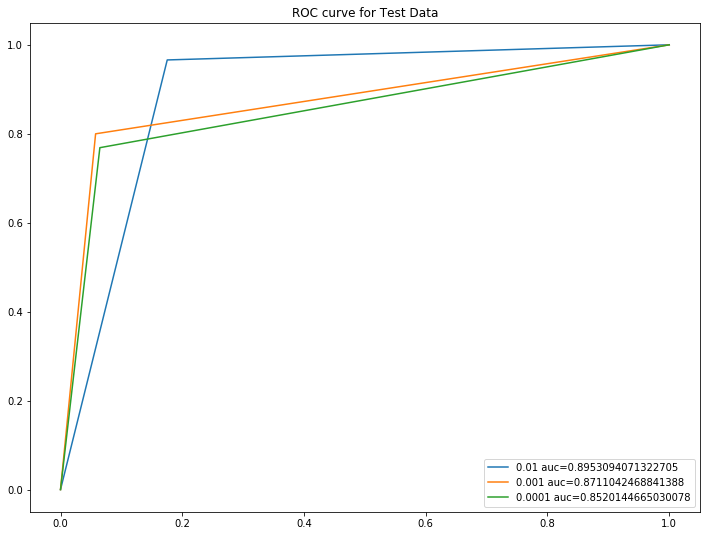

In [0]:
#Test Data
from sklearn import metrics
import matplotlib.pyplot as plt

auc=list()
for i in range(len(alpha)):
  fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test[i])
  auc.append(metrics.roc_auc_score(y_test, pred_test[i]))
  plt.plot(fpr,tpr,label=str(alpha[i])+" auc="+str(auc[i]))
plt.legend(loc=4)
plt.title("ROC curve for Test Data")
plt.show()

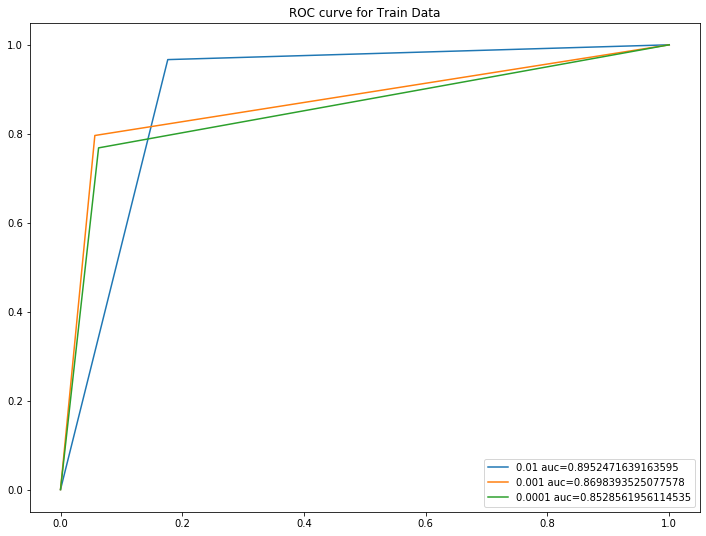

In [0]:
#Training Data
from sklearn import metrics
import matplotlib.pyplot as plt

auc=list()
for i in range(len(alpha)):
  fpr, tpr, _ = metrics.roc_curve(y_train,  pred_train[i])
  auc.append(metrics.roc_auc_score(y_train, pred_train[i]))
  plt.plot(fpr,tpr,label=str(alpha[i])+" auc="+str(auc[i]))
plt.legend(loc=4)
plt.title("ROC curve for Train Data")
plt.show()

#Experiment2: Changing Convergence Threshold

In [6]:
#Multiple convergence threshold

converge_thresh=[10**-9,10**-6,10**-3]
alpha=0.001
pred_train=list()
pred_test=list()
for i in range(len(converge_thresh)):
    lr= LogisticRegression(alpha=alpha, epochs=100000, conv_thres=converge_thresh[i],intercept=False, verbose=True)
    %time lr.fit(X_train,y_train)
    #pred_train.append(lr.predict(X_train))
    pred_train.append(lr.predict(X_train))
    pred_test.append(lr.predict(X_test))
    #print(len(alpha),alpha,i)

loss: 0.892995340583611 	
loss: 0.2490753546944817 	
loss: 0.2429051210112144 	
loss: 0.24049361585809098 	
loss: 0.2388293571708665 	
loss: 0.23740591405423545 	
loss: 0.23609616845196615 	
loss: 0.23486019196785904 	
loss: 0.23368266047226827 	
loss: 0.23255629647561873 	
loss: 0.23147683713230913 	
loss: 0.23044130719906208 	
loss: 0.22944735275187766 	
loss: 0.22849295573541192 	
loss: 0.22757630099978005 	
loss: 0.2266957103825208 	
loss: 0.22584960838503584 	
loss: 0.22503650343263873 	
loss: 0.22425497703841268 	
loss: 0.2235036770447881 	
loss: 0.22278131299488332 	
loss: 0.22208665263109742 	
loss: 0.22141851900275797 	
loss: 0.22077578791545768 	
loss: 0.22015738558485268 	
loss: 0.21956228642525474 	
loss: 0.21898951093818358 	
loss: 0.21843812368398102 	
loss: 0.21790723132830547 	
loss: 0.217395980759948 	
loss: 0.21690355727811975 	
loss: 0.21642918284834434 	
loss: 0.21597211442607184 	
loss: 0.21553164234732805 	
loss: 0.2151070887852974 	
loss: 0.2146978062716837 	
los

In [7]:
for i in range(len(converge_thresh)):
  ##Test Accuracy
  print("Test Accuracy for learning rate {0} is {1}".format(converge_thresh,((pred_test[i]==y_test).mean())))

  #Train accuracy
  print("Training Accuracy for learning rate {0} is {1}".format(converge_thresh,((pred_train[i]==y_train).mean())))
  

Test Accuracy for learning rate [1e-09, 1e-06, 0.001] is 0.9251655629139073
Training Accuracy for learning rate [1e-09, 1e-06, 0.001] is 0.9246984389782403
Test Accuracy for learning rate [1e-09, 1e-06, 0.001] is 0.9054635761589404
Training Accuracy for learning rate [1e-09, 1e-06, 0.001] is 0.9049195837275308
Test Accuracy for learning rate [1e-09, 1e-06, 0.001] is 0.8426738410596026
Training Accuracy for learning rate [1e-09, 1e-06, 0.001] is 0.8441639072847682


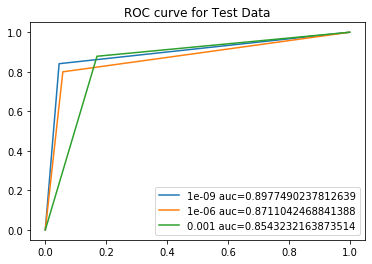

In [9]:
#Test Plot
from sklearn import metrics
import matplotlib.pyplot as plt

auc=list()
for i in range(len(converge_thresh)):
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test[i])
    auc.append(metrics.roc_auc_score(y_test, pred_test[i]))
    plt.plot(fpr,tpr,label=str(converge_thresh[i])+" auc="+str(auc[i]))
plt.legend(loc=4)
plt.title("ROC curve for Test Data")
plt.show()

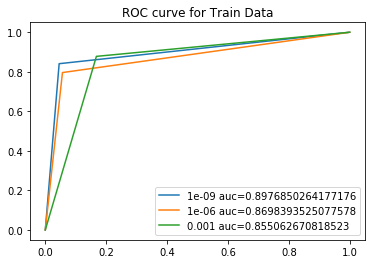

In [10]:
#Train Plot
from sklearn import metrics
import matplotlib.pyplot as plt

auc=list()
for i in range(len(converge_thresh)):
  fpr, tpr, _ = metrics.roc_curve(y_train,  pred_train[i])
  auc.append(metrics.roc_auc_score(y_train, pred_train[i]))
  plt.plot(fpr,tpr,label=str(converge_thresh[i])+" auc="+str(auc[i]))
plt.legend(loc=4)
plt.title("ROC curve for Train Data")
plt.show()

In [0]:
#Randomly select 8 features

#Experiment3: Random Feature Selection

In [0]:
X_8=X.sample(n=8,axis=1)
print(X_8.head())
#produce 70,30 split
from sklearn.model_selection import train_test_split

X_8_train, X_8_test, y_8_train, y_8_test = train_test_split(X_8, y, test_size=0.3, random_state=1)

   NWG  KWI  SB  MDIMC  KWG  VWN  MDIMA  STRM
0   16    2   0      8   16    1      8     0
1   16    2   1      8   16    1      8     0
2   16    2   0      8   16    1      8     0
3   16    2   1      8   16    1      8     0
4   16    2   0      8   16    1      8     0


In [0]:
lr= LogisticRegression(alpha=0.001, epochs=100000, conv_thres=0.000001,intercept=False, verbose=True)
%time lr.fit(X_8_train,y_8_train)



loss: 0.6839699183804866 	
loss: 0.47386943168080314 	
Converged at  1388
CPU times: user 48.3 s, sys: 34.8 s, total: 1min 23s
Wall time: 42 s


In [0]:
pred_train=lr.predict(X_8_train)
pred_test=lr.predict(X_8_test)

In [0]:
##Accuracy
acct_test=(pred_test==y_8_test).mean()
print("Test Accuracy ",acct_train)
acct_train=(pred_train==y_8_train).mean()
print("Train Accuracy ",acct_test)


Test Accuracy  0.7676462472406181
Train Accuracy  0.7676462472406181


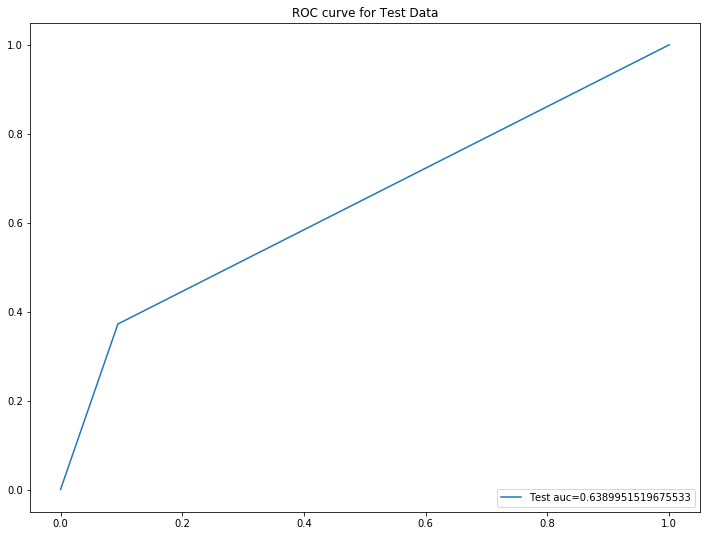

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr_t, tpr_t, _ = metrics.roc_curve(y_8_test,  pred_test)
auc_test = metrics.roc_auc_score(y_8_test, pred_test)
plt.plot(fpr_t,tpr_t,label="Test auc="+str(auc_test))

plt.legend(loc=4)
plt.title("ROC curve for Test Data")
plt.show()

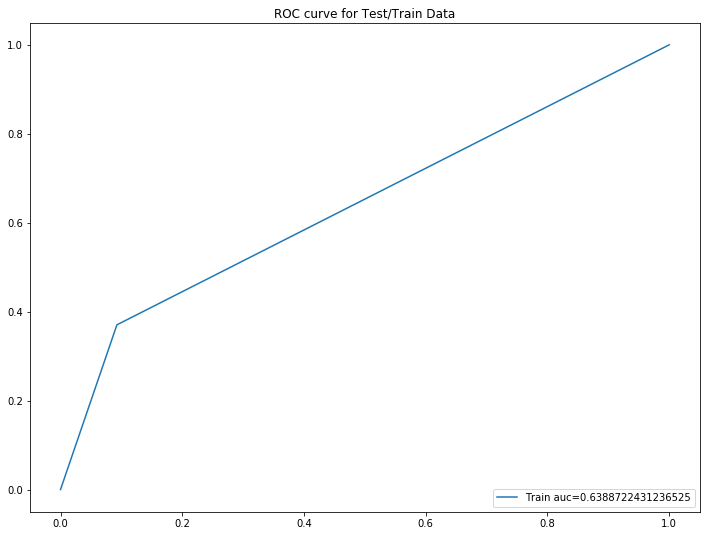

In [0]:
fpr_tr, tpr_tr, _ = metrics.roc_curve(y_8_train,  pred_train)
auc_train = metrics.roc_auc_score(y_8_train, pred_train)
plt.plot(fpr_tr,tpr_tr,label="Train auc="+str(auc_train))
plt.legend(loc=4)
plt.title("ROC curve for Train Data")
plt.show()

#Experiment4: Manual Feature Selection

In [0]:
#Handpicked Features

X_8_M=X[['MWG','VWN','STRN','VWM','MDIMA','KWI','SB','KWG']]
print(X_8_M.head())
#produce 70,30 split
from sklearn.model_selection import train_test_split

X_8_M_train, X_8_M_test, y_8_M_train, y_8_M_test = train_test_split(X_8_M, y, test_size=0.3, random_state=1)

   MWG  VWN  STRN  VWM  MDIMA  KWI  SB  KWG
0   16    1     0    1      8    2   0   16
1   16    1     0    1      8    2   1   16
2   16    1     0    1      8    2   0   16
3   16    1     0    1      8    2   1   16
4   16    1     1    1      8    2   0   16


In [0]:
lr= LogisticRegression(alpha=0.001, epochs=100000, conv_thres=0.000001,intercept=False, verbose=True)
%time lr.fit(X_8_M_train,y_8_M_train)


loss: 0.6856874656987841 	
loss: 0.4854455743357949 	
loss: 0.48258952947005707 	
Converged at  2962
CPU times: user 1min 44s, sys: 1min 13s, total: 2min 58s
Wall time: 1min 30s


In [0]:
##Accuracy
acct_test=(pred_test==y_8_M_test).mean()
print("Test Accuracy ",acct_test)
acct_train=(pred_train==y_8_M_train).mean()
print("Train Accuracy ",acct_train)

Test Accuracy  0.7676462472406181
Train Accuracy  0.7665562913907285


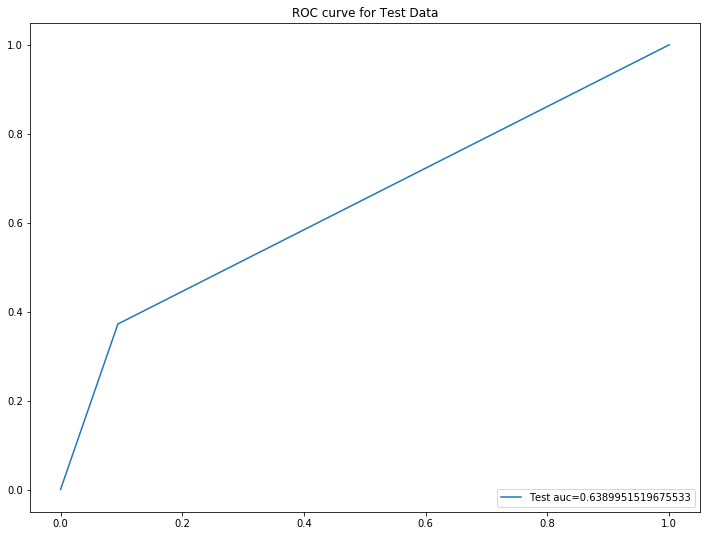

In [0]:
#Test Plot
from sklearn import metrics
import matplotlib.pyplot as plt


fpr_t, tpr_t, _ = metrics.roc_curve(y_8_M_test,  pred_test)
auc_test = metrics.roc_auc_score(y_8_M_test, pred_test)
plt.plot(fpr_t,tpr_t,label="Test auc="+str(auc_test))

plt.legend(loc=4)
plt.title("ROC curve for Test Data")
plt.show()

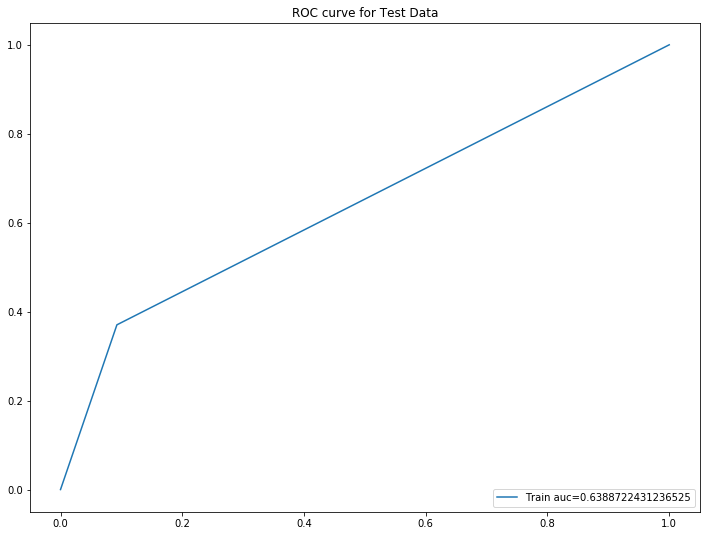

In [0]:
#Train Plot
fpr_tr, tpr_tr, _ = metrics.roc_curve(y_8_M_train,  pred_train)
auc_train = metrics.roc_auc_score(y_8_M_train, pred_train)
plt.plot(fpr_tr,tpr_tr,label="Train auc="+str(auc_train))
plt.legend(loc=4)
plt.title("ROC curve for Test Data")
plt.show()